#Infer spike-like events from constrained foopsi

In this notebook, we'll simulate some calcium data and then perform spike time inference to test out the code.

Then we'll try it out on a small bit of real data.  

Note: this code can run much faster if you download MOSEK


In [50]:
%matplotlib inline

import numpy as np
import scipy.signal as scs
import matplotlib.pyplot as plt
from constrained_foopsi import *

np.random.seed(1200)
T = 5e2;
pr = 0.05;
sp = np.random.uniform(0,1,T)<pr
sp.astype(float)

gr = [0.95,0.8]
g = np.array([np.sum(gr),-np.prod(gr)])

c = scs.lfilter(np.array([1]),np.concatenate([np.array([1.]),-g]),sp)
sn = 2;
y = c + sn*np.random.normal(0,1,T) 

#Simulated data
we'll plot the noiseless simulated calcium trace in red and the noisy simulated trace in blue

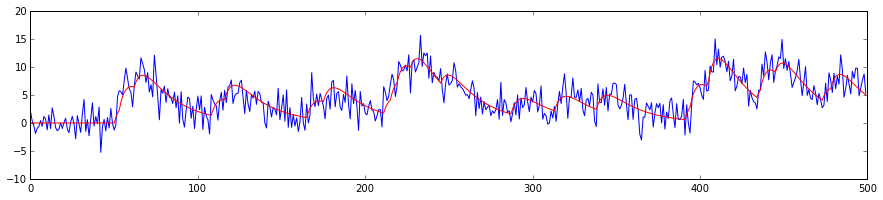

In [51]:
plt.figure(figsize=(15,3))
plt.plot(y)
plt.plot(c,'r')

In [52]:
opt = {'verbosity' : False}
c2,b2,c12,g2,sn2,sp2 = constrained_foopsi(y, options = opt)

gd_vec = np.max(np.roots(np.concatenate([np.array([1]),-g.flatten()])))**np.arange(T)
c_inferred = c2 + b2 + c12*gd_vec

#Results of inference
After performing inference, we'll plot the "true" (i.e. simulated) calcium trace in red and the model-fitted calcium trace in green.

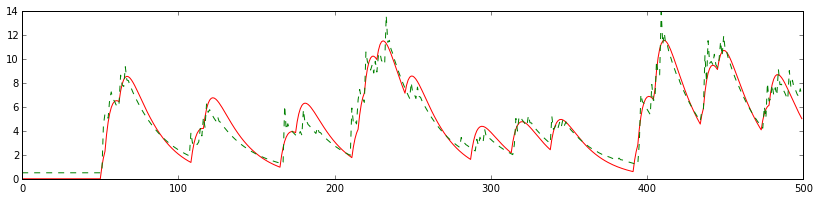

In [53]:
plt.figure(figsize=(14,3))
plt.plot(np.arange(T),c,'r')
plt.plot(np.arange(T),c_inferred,'g--')

We can also plot the infered spike times.  Note that there is also a threshold that we introduce here for the spikes -- the spike inference (sp2) gives a real positive number for each timestep.  To turn this into spikes, we select a threshold and only consider a spike to have occured when the real number is greater than that threshold.

(0.5, 1.5)

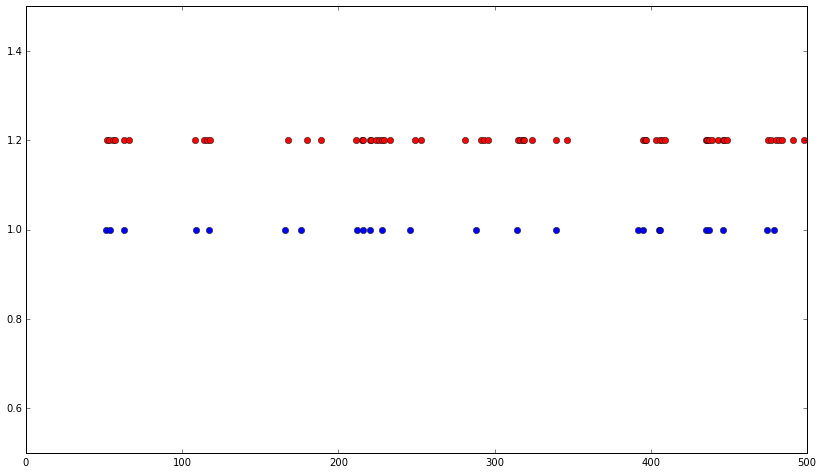

In [71]:
plt.figure(figsize=(14,8))
plt.plot(np.arange(T),sp,'o')
sp2_vis = sp2>.6 
plt.plot(np.arange(T),sp2_vis+.2,'ro')
plt.ylim([.5,1.5])

#try real data

In [55]:
%matplotlib inline

import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy import ndimage

import CAM_NWB as cn

In [56]:
path = '/media/josh/Brain2015/CAM/479681980/479681980.nwb'

# get traces
getting traces as demo'd by Saskia

In [57]:
timestamps, celltraces = cn.getFluorescenceTraces(path)

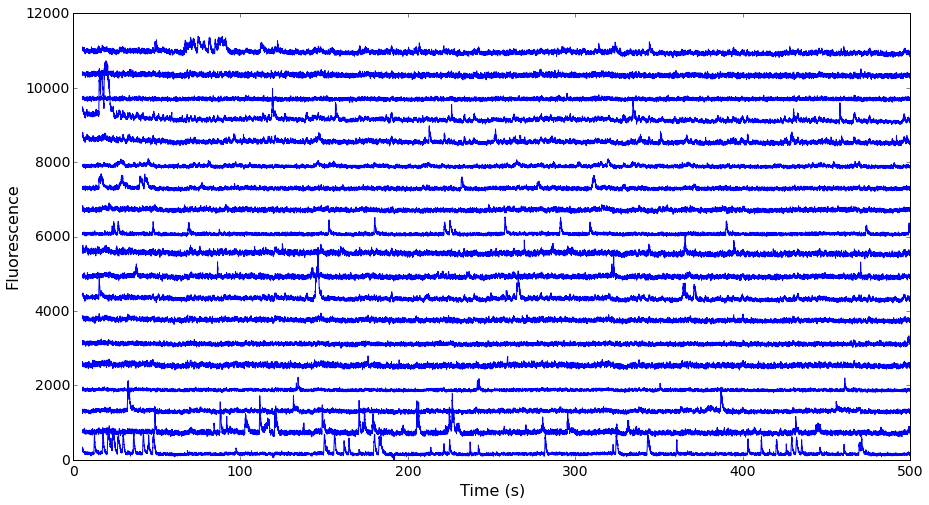

In [58]:
plt.figure(figsize=(15,8))
for i,v in enumerate(celltraces[1:20,:]):
    v = v -np.min(v)
    plt.plot(timestamps,v+(i*600),color='blue')
plt.xlim(0,500)
#plt.ylim(0,32500)
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Fluorescence", fontsize=16)
plt.tick_params(labelsize=14)

##Select a sub-trace, just to try things out

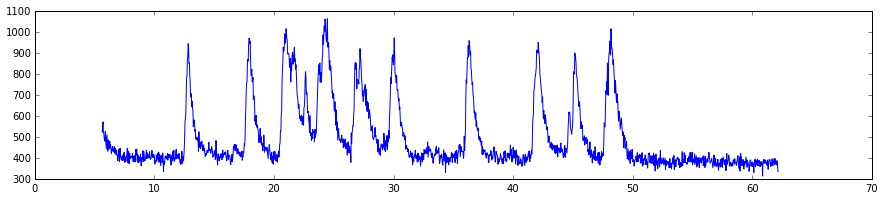

In [59]:
plt.figure(figsize=(15,3))

ntimestep = 1700
plt.plot(timestamps[0:ntimestep],celltraces[1,0:ntimestep],color='blue')

In [60]:
celltraces[1,1400:ntimestep].std() #get a sense of the SNR

18.355631

In [61]:
y_real = celltraces[1,0:ntimestep]

opt = {'verbosity' : False}
c_real,b_real,cr_real,g_real,sn_real,sp_real = constrained_foopsi(y_real, options = opt)

gd_vec_real = np.max(np.roots(np.concatenate([np.array([1]),-g.flatten()])))**np.arange(ntimestep)
c_inferred_real = c_real + b_real + cr_real*gd_vec_real

#Plot inference results
Plot the real trace in blue and the predicted trace in red

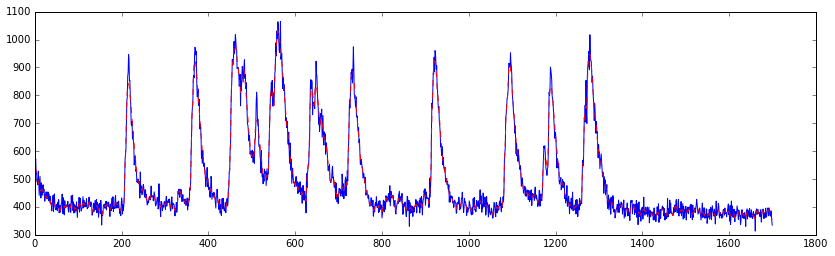

In [62]:
plt.figure(figsize=(14,4))
plt.plot(np.arange(ntimestep),y_real)
plt.plot(np.arange(ntimestep),c_inferred_real,'r--')

##Visualize real-valued spike estimates

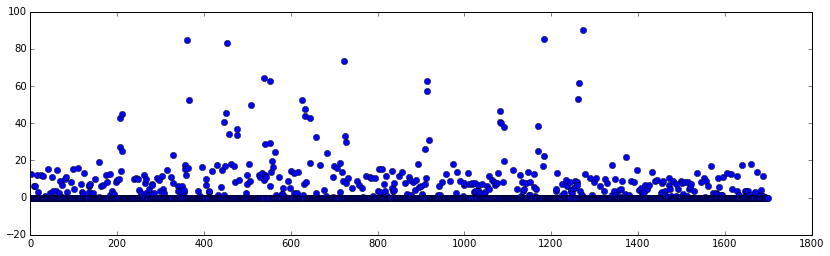

In [63]:
plt.figure(figsize=(14,4))
plt.plot(np.arange(ntimestep),sp_real,'o')

##Threshold the spike estimates to get the inferred spike times

(0, 2)

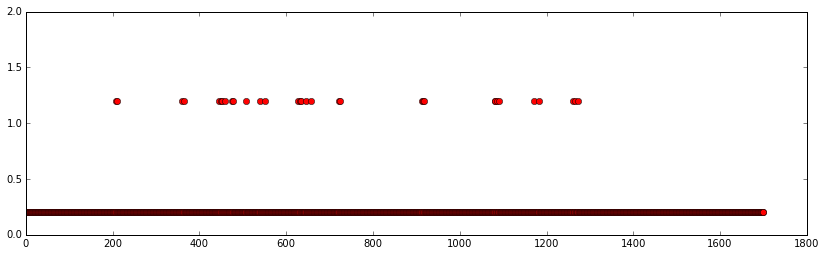

In [64]:
plt.figure(figsize=(14,4))
sp_real_vis = sp_real>sp_real.max()/3
plt.plot(np.arange(ntimestep),sp_real_vis+.2,'ro')
plt.ylim([0,2])